# Análise exploratória de dados espaciais - AEDE

<br>
Municípios grandes produtores de alguma cultura tendem a estar próximos de municípios também produtores dessa cultura ou de municípios que não o produzem? O objetivo da análise exploratória de dados espaciais (AEDE) é responder a esse tipo de questão. De forma mais geral, a questão é qual a a associação entre o valor de certa variável em um lugar e os valores dessa mesma variável nos lugares vizinhos. Localidades com valores semelhantes de determinada variável tendem a estar próximas? Para isso, ela mede a autocorrelação espacial, por meio do $I$ de Moran.

In [1]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp
!pip install shapely  ==1.7.0
!pip install --upgrade descartes
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
!pip install pysal

  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


ERROR: Invalid requirement: '==1.7.0'


  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379633 sha256=78a960e8905f4a9f9daa23ce589513436f85d9a77f6c3fb5598c3864fabfc07c
  Stored in directory: c:\users\luan lima\appdata\local\pip\cache\wheels\30\ee\b3\e9481434910c8756e2421f09b22a4673190e7412e9faaecf4a
  Created wheel for splot: filename=splot-1.1.3-py3-none-any.whl size=37888 sha256=a5aa2b9c131d61ae893de042aa8f7755693ca38367519075301f1960c3b446dc
  Stored in directory: c:\users\luan lima\appdata\local\pip\cache\wheels\e7\76\29\7185415bfea8ea23574e77329c210b50daf3af7cf477ee9b8d
Successfully built libpysal splot
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
basemap 1.3.8 requires basemap-data<1.4,>=1.3.2, but you have basemap-data 1.3.0b1 which is incompatible.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached mapclassify-2.6.1-py3-none-any.whl (38 kB)
  Using cached geopandas-0.14.1-py3-none-any.whl (1.1 MB)
  Created wheel for inequality: filename=inequality-1.0.0-py3-none-any.whl size=11798 sha256=9604e13c9003ccb593ed9dcbd85e7a94edae8bd50b69bb90595db5f161c6bf11
  Stored in directory: c:\users\luan lima\appdata\local\pip\cache\wheels\80\71\07\4d4c8ecaba710bd79e91014602e70fc4d008328c99d524db40
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46386 sha256=1090d8ca44d8ec015f8694c1ea101a7f9176e0956230c32dd053e9179d811a02
  Stored in directory: c:\users\luan lima\appdata\local\pip\cache\wheels\7f\03\f3\6d95ff5d1911ba9e13f98d96dab2afb10969270ee75ab82bc8
  Created wheel for spint: filename=spint-1.0.7-py3-none-any.whl size=31383 sha256=8e23075e2de25edb6f948c55dadcd2034afd251d7df22a727be07fe56ed3f8c2
  Stored in directory: c:\users\luan lima\appdata\local\pip\cache\wheels\93\a7\ea\0e65be5d06cd2860a4c2ea99656ead582f96aa3954652b6ad7
  Created wheel for spvcm: filena

In [3]:
pip install pysal

  Using cached pysal-23.7-py3-none-any.whl (17 kB)
  Using cached esda-2.5.1-py3-none-any.whl (132 kB)
  Using cached segregation-2.5-py3-none-any.whl (141 kB)
  Using cached tobler-0.11.2-py3-none-any.whl (34 kB)
     -------------------------------------- 277.8/277.8 kB 2.1 MB/s eta 0:00:00
  Using cached spreg-1.4.2-py3-none-any.whl (331 kB)
  Using cached splot-1.1.5.post1-py3-none-any.whl (39 kB)
  Using cached spopt-0.5.0-py3-none-any.whl (112 kB)
  Using cached access-1.1.9-py3-none-any.whl (21 kB)
  Using cached spint-1.0.7.tar.gz (28 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached giddy-2.3.4-py3-none-any.whl (61 kB)
  Using cached spaghetti-1.7.4-py3-none-any.whl (50 kB)
  Using cached spglm-1.1.0-py3-none-any.whl (41 kB)
     ---------------------------------------- 2.8/2.8 MB 3.7 MB/s eta 0:00:00
  Using cached spvcm-0.3.0.tar.gz (5.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (s


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

# links com arquivos úteis
link = 'https://raw.githubusercontent.com/lincolnfrias/dados/master/'
link_p = 'https://raw.githubusercontent.com/patriciasiqueira/patriciasiqueira.github.io/master/arquivos/'

In [5]:
# ler dados de interesse
dados = pd.read_csv(link_p+'qtde-22.csv', encoding='latin1')
# quantidade produzida em toneladas em 2017

# para ler um arquivo salvo no computador
# ir primeiro em > e Files
# dados = pd.read_csv('qtde_22.csv', encoding='latin1')

In [6]:
# nomes das variáveis
dados.columns

Index(['ibge7', 'mun', 'nome_meso', 'abacate', 'abacaxi', 'alho', 'amendoim',
       'arroz', 'aveia', 'banana', 'batata-doce', 'batata-inglesa',
       'cafe_total', 'cafe_arab', 'cana', 'feijao', 'girassol', 'laranja',
       'maracuja', 'milho', 'soja', 'sorgo', 'tomate', 'trigo', 'uva'],
      dtype='object')

In [8]:
# número de linhas e colunas do dataframe
dados.shape

(853, 25)

In [9]:
# mostrar algumas linhas do dataframe
dados.head(3)

,ibge7,mun,nome_meso,abacate,abacaxi,alho,amendoim,arroz,aveia,banana,...,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
0,3100104,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,2,0,47,...,18,0,0,0,8028,11685,1212,100,0,0
1,3100203,Abaeté,Central Mineira,0,540,0,0,8,0,28,...,0,0,0,63,4680,1404,0,0,0,0
2,3100302,Abre Campo,Zona da Mata,0,0,0,0,0,0,50,...,170,0,0,0,780,0,0,0,0,0


In [10]:
# renomear colunas
# 'ibge7' será 'mun' (código do município)
# 'mun' será 'município' (nome do município)

dados.rename(columns={'mun': 'municipio'}, inplace=True)  # inplace = True modifica o dataframe
dados.rename(columns={'ibge7': 'mun'}, inplace=True)

In [11]:
# ler shapefile
link = 'https://raw.githubusercontent.com/lincolnfrias/dados/master/mg.json'
geodf = gp.read_file(link)

In [12]:
geodf.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.42967 -18.16543, -47.42307 -18.1..."
1,ABAETÉ,3100203,"POLYGON ((-45.13930 -19.21048, -45.15975 -19.1..."
2,ABRE CAMPO,3100302,"POLYGON ((-42.31071 -20.14279, -42.32217 -20.1..."
3,ACAIACA,3100401,"POLYGON ((-43.02387 -20.41022, -43.03283 -20.4..."
4,AÇUCENA,3100500,"POLYGON ((-42.36208 -18.92569, -42.36636 -18.9..."


In [13]:
# mesclar shapefile com dataframe
# usando a coluna mun
geodf.rename(columns={'CD_GEOCMU': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
geodf['mun'] = geodf.mun.astype(int)  # transformar códigos em inteiros
mg = pd.merge(geodf, dados, on='mun', suffixes=('', '_y'))  # mesclar o dataframe e o shapefile
mg.shape

(853, 27)

In [14]:
# ver objeto resultante (dataframe + shapefile)
mg.head(3)

,NM_MUNICIP,mun,geometry,municipio,nome_meso,abacate,abacaxi,alho,amendoim,arroz,...,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.42967 -18.16543, -47.42307 -18.1...",Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,2,...,18,0,0,0,8028,11685,1212,100,0,0
1,ABAETÉ,3100203,"POLYGON ((-45.13930 -19.21048, -45.15975 -19.1...",Abaeté,Central Mineira,0,540,0,0,8,...,0,0,0,63,4680,1404,0,0,0,0
2,ABRE CAMPO,3100302,"POLYGON ((-42.31071 -20.14279, -42.32217 -20.1...",Abre Campo,Zona da Mata,0,0,0,0,0,...,170,0,0,0,780,0,0,0,0,0


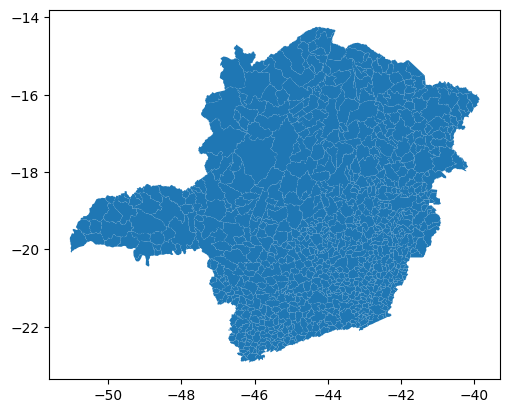

In [15]:
mg.plot();

In [16]:
mg.columns

Index(['NM_MUNICIP', 'mun', 'geometry', 'municipio', 'nome_meso', 'abacate',
       'abacaxi', 'alho', 'amendoim', 'arroz', 'aveia', 'banana',
       'batata-doce', 'batata-inglesa', 'cafe_total', 'cafe_arab', 'cana',
       'feijao', 'girassol', 'laranja', 'maracuja', 'milho', 'soja', 'sorgo',
       'tomate', 'trigo', 'uva'],
      dtype='object')

In [17]:
variavel = 'soja'

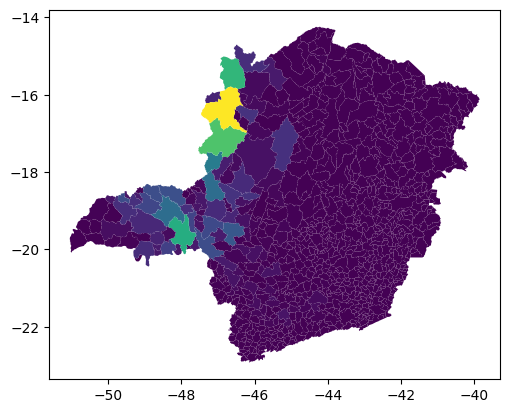

In [18]:
# mapa temático - simples
mg.plot(variavel);

Esquemas de cores: cmap (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

- PuBu

- GnBu

- Oranges

- BuGn

- Purples

- YlOrBr


c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 4 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


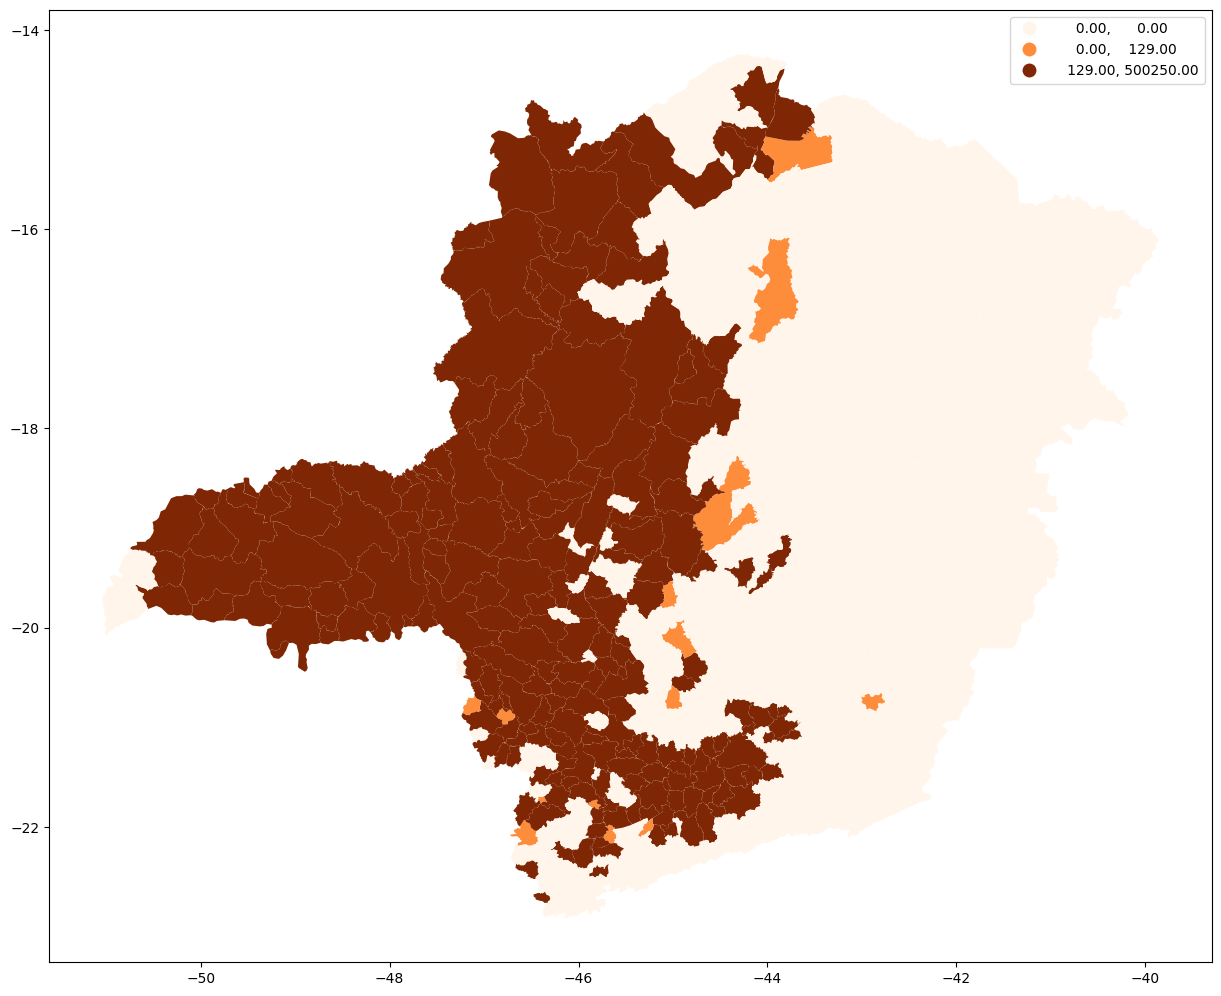

In [19]:
# mapa temático - com opções
# scheme='Quantiles' ou 'Equal_Interval'
# quantiles: atribui mesma quantidade de valores para cada categoria. Apesar de esconder valores extremos,
# pode se tornar mais informativa se a distribuição for assimétrica
# perceber as diferenças entre os esquemas: cmap='PuBu', por exemplo


mg.plot(column=variavel, figsize=(15, 13), scheme='quantiles', legend=True, k=4, cmap='Oranges');

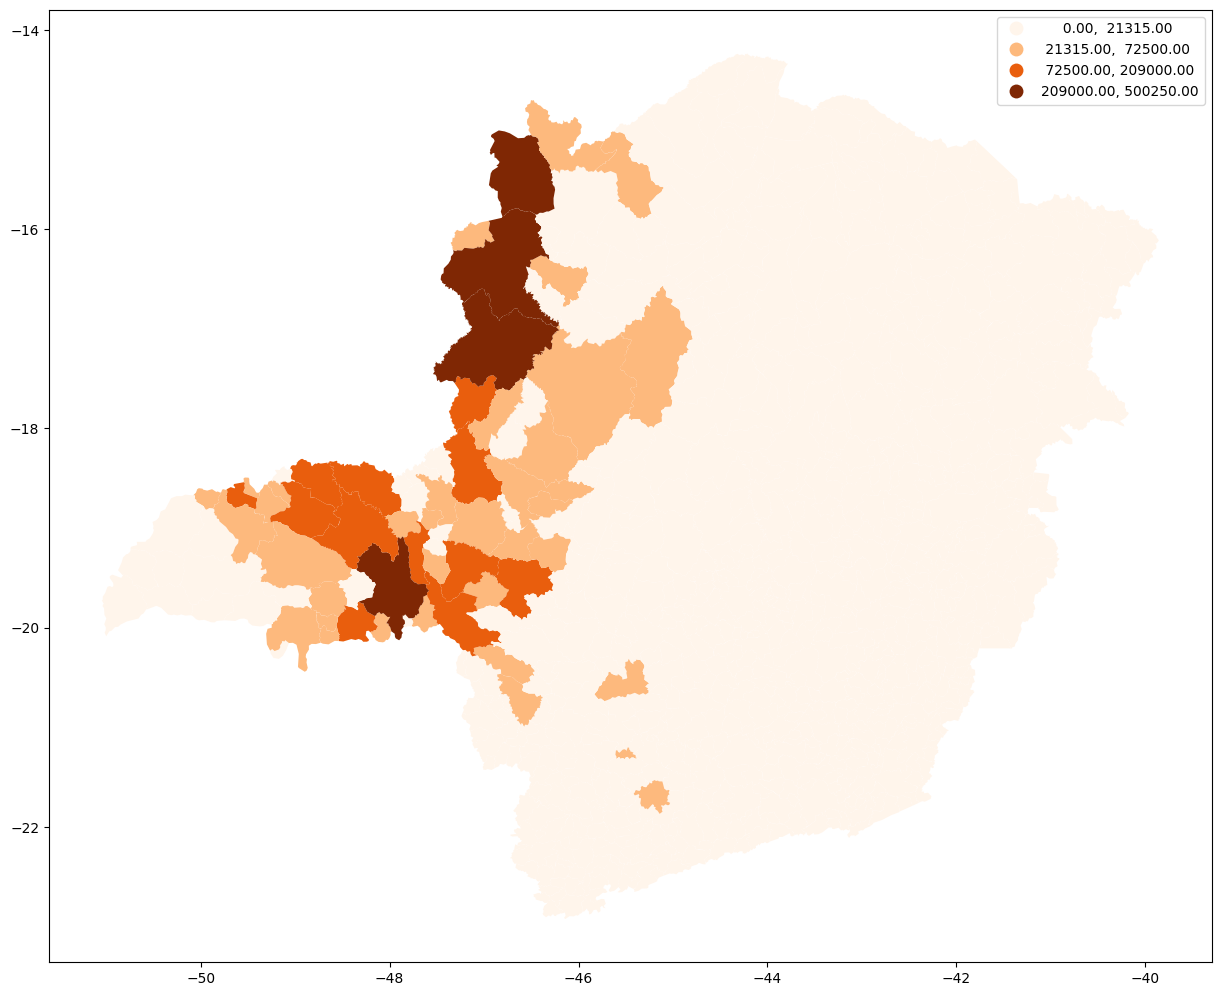

In [20]:
# mapa temático - com opções
# scheme='equal_interval', 'fisher_jenks'
mg.plot(column=variavel, figsize=(15, 13), scheme='fisher_jenks', legend=True, k=4, cmap='Oranges');

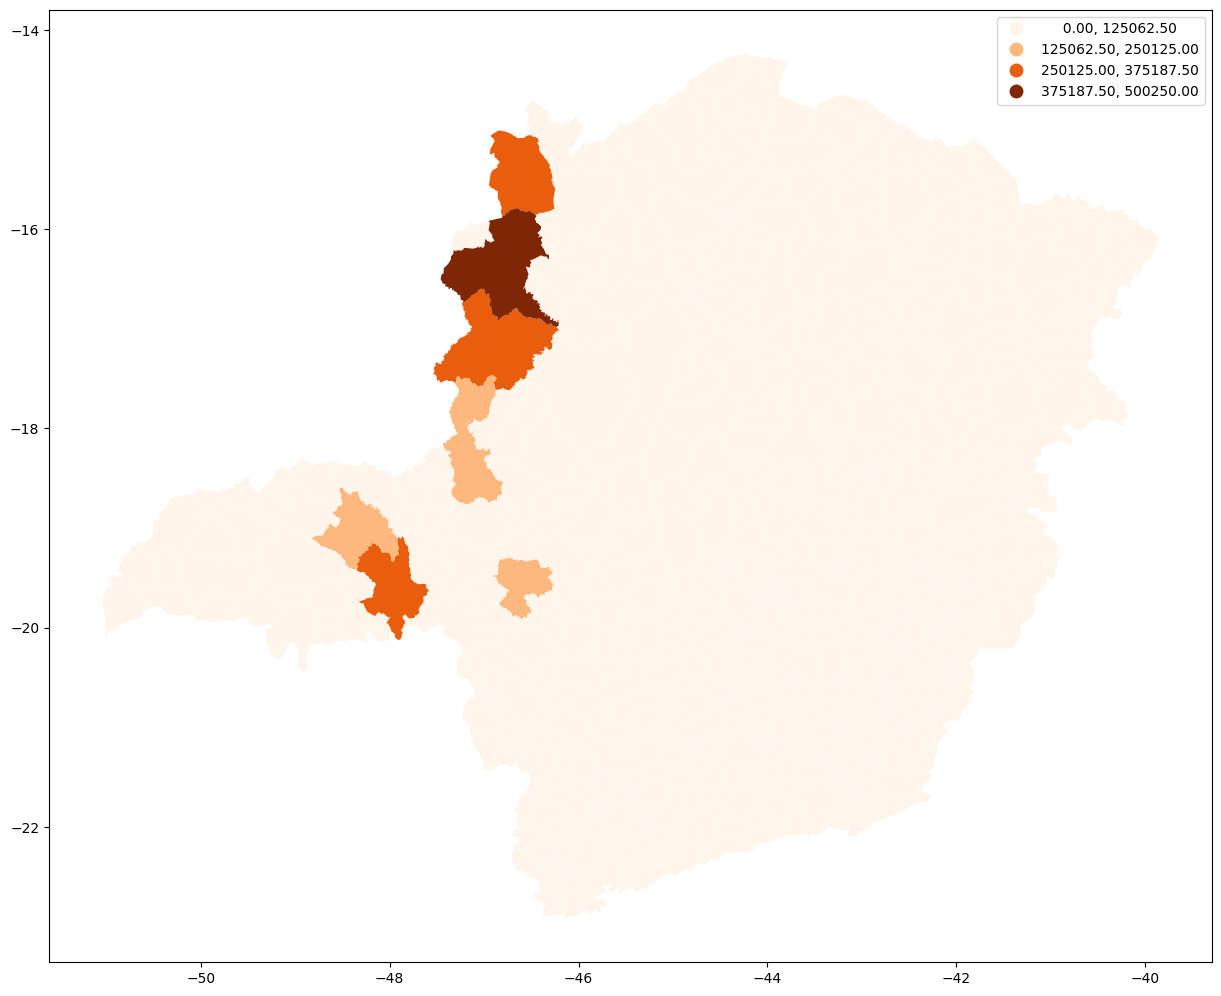

In [21]:
# mapa temático - com opções
# escolher diferentes esquemas de cores
mg.plot(column=variavel, figsize=(15, 13), scheme='equal_interval', legend=True, k=4, cmap='Oranges');

In [22]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(mg)
w.transform = 'r'

C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_25924\2525137630.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(mg)


# I de Moran

Estatística mais utilizada para medir a autocorrelação espacial. Ela mede a relação do desvio padronizado de uma variável numa área com o desvio padronizado das áreas vizinhas para a mesma variável:

$$I=\frac{N}{S_{0}}\frac{\displaystyle\sum_{i=1}^{n}\sum_{j=1}^{n}w_{ij}z_{i}z_{j}}{\displaystyle\sum_{i=1}^{n}z^{2}_{i}},$$
em que:

- $z_i = y_i - \bar{y}$ representa o desvio em relação à média da variável.
- $y_i$: valor da variável em um determinado local $i$
- $N$: número de observações
- $S_0 = \sum\sum w_{ij}$
- $E[I] = -1/(N - 1) \approx 0$
            
Se o valor-$p$ referente ao teste do $I$ de Moran for significativo, podemos olhar para o valor da estatística $I$ e concluir:

- $I > 0$: autocorrelação espacial positiva (*clusters* espaciais - HH, LL)
- $I < 0$: autocorrelação espacial negativa (*outliers* espaciais - HL, LH)

In [23]:
# calcular I de Moran global para a variável escolhida
y = mg[variavel].values
moran = Moran(y, w)
moran.I

0.4983387682998699

In [24]:
# valor-p
moran.p_sim

0.001

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


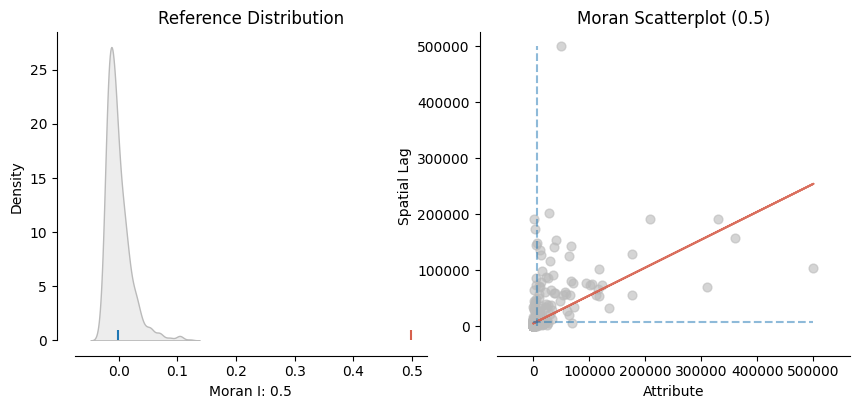

In [25]:
# diagrama de dispersão de Moran
plot_moran(moran, zstandard=False, figsize=(10,4));

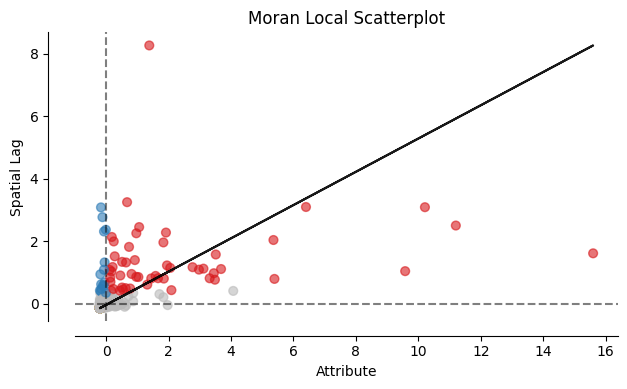

In [26]:
moran_loc = Moran_Local(y, w)
moran_scatterplot(moran_loc, p=0.05);

### LISA

- Estatística para detectar padrões locais de autocorrelação espacial: *Local Indicator of Spatial Association* (LISA), ou $I$ de Moran local  
- Permite verificar se há agrupamentos espaciais estatisticamente significativos
- Útil quando a estatística $I$ de Moran global for significativa

$$I_{i}=z_{i}\sum_{j=1}^{j}w_{ij}y_{j}$$  

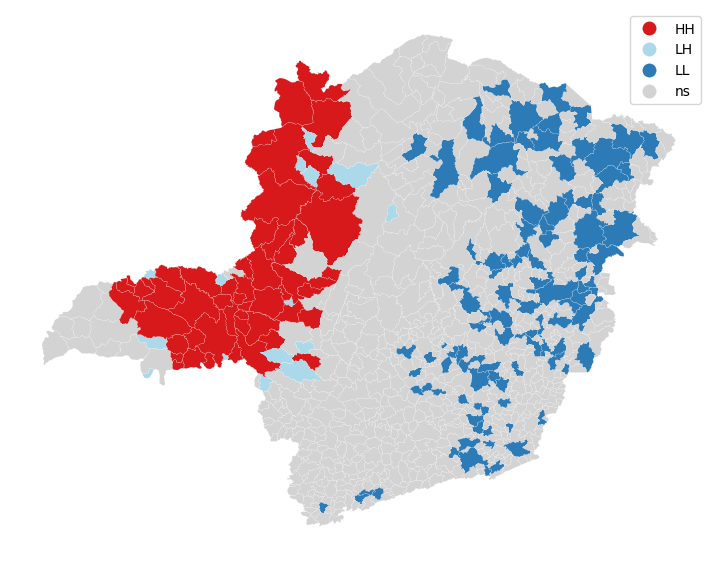

In [27]:
lisa_cluster(moran_loc, mg, p=0.05, figsize = (9,9));

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


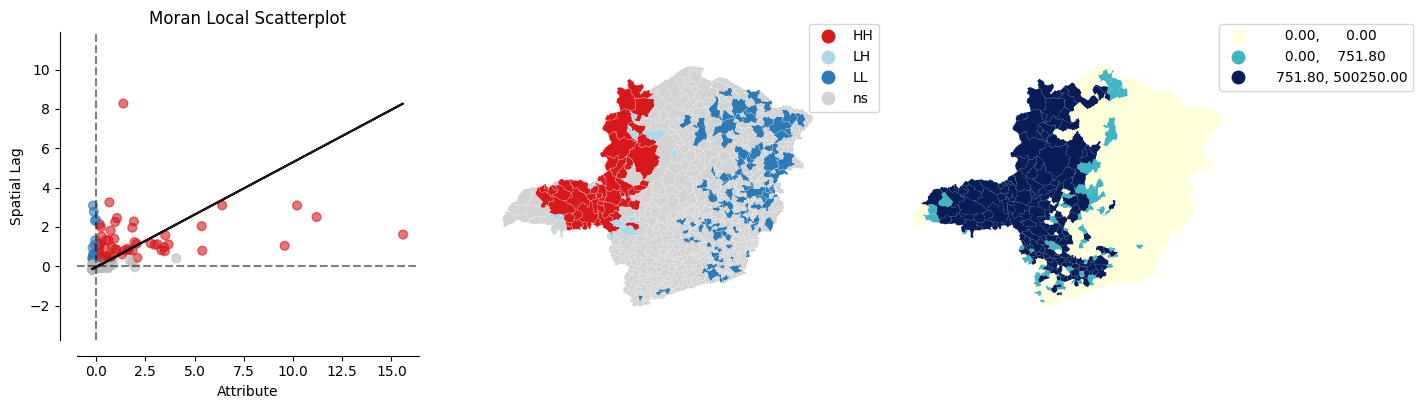

In [28]:
plot_local_autocorrelation(moran_loc, mg, variavel);